In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
csvpath = "Resources/train_data.csv"
df = pd.read_csv(csvpath, low_memory=False)
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682154 entries, 0 to 682153
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   GameId                  682154 non-null  int64  
 1   PlayId                  682154 non-null  int64  
 2   Team                    682154 non-null  object 
 3   X                       682154 non-null  float64
 4   Y                       682154 non-null  float64
 5   S                       682154 non-null  float64
 6   A                       682154 non-null  float64
 7   Dis                     682154 non-null  float64
 8   Orientation             682131 non-null  float64
 9   Dir                     682126 non-null  float64
 10  NflId                   682154 non-null  int64  
 11  DisplayName             682154 non-null  object 
 12  JerseyNumber            682154 non-null  int64  
 13  Season                  682154 non-null  int64  
 14  YardLine            

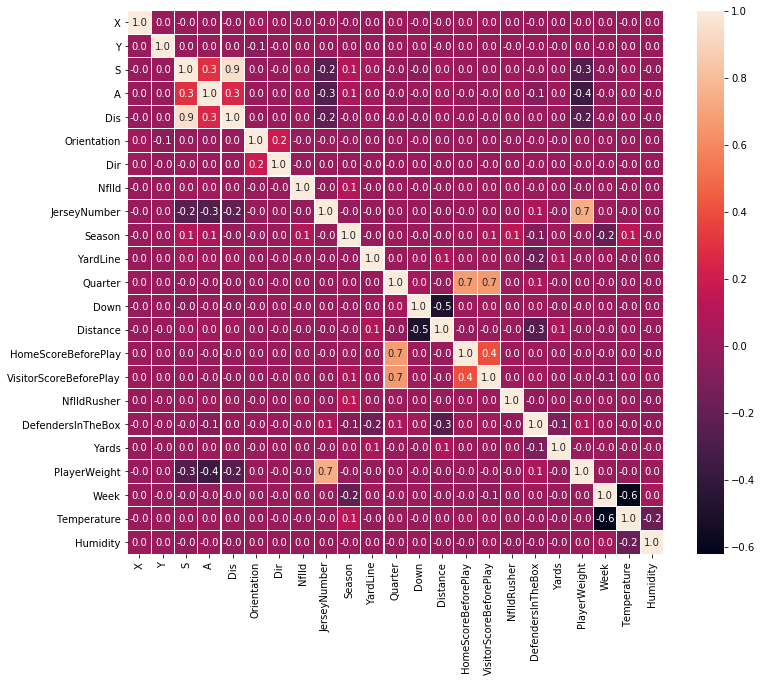

In [7]:
correlation = plt.subplots(figsize=(12,10))
sns.heatmap(df.iloc[:,2:].corr(),annot=True, linewidths=.1, fmt='.1f')

plt.show()

In [8]:
unique_plays = df.groupby('Season').agg({'PlayId': 'nunique', 'GameId': 'nunique', 'NflId':'nunique'})
unique_plays.columns = ["PlayCount","GameCount", "PlayerCount"]

unique_plays

,PlayCount,GameCount,PlayerCount
Season,,,
2017,11900,256,1788
2018,11271,256,1783
2019,7836,176,1661


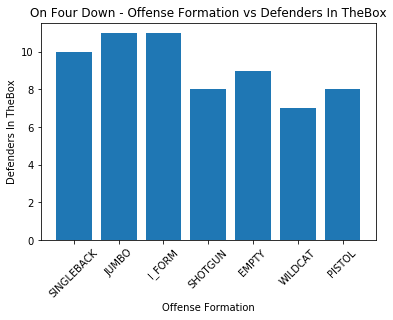

In [9]:
four = df.loc[df["Down"] == 4]

offenseFormation = four["OffenseFormation"]
defendersInTheBox = four["DefendersInTheBox"]

plt.bar(offenseFormation, defendersInTheBox)
plt.title("On Four Down - Offense Formation vs Defenders In TheBox")
plt.xlabel("Offense Formation")
plt.xticks(rotation=45)
plt.ylabel("Defenders In TheBox")

plt.show()

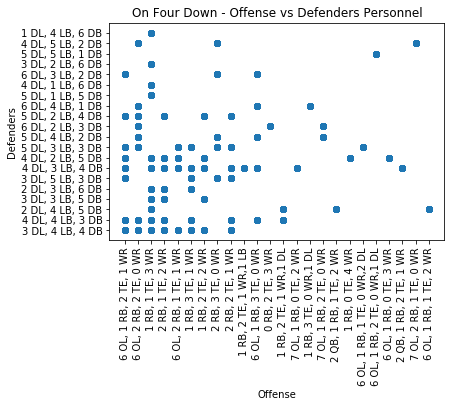

In [10]:
offensePersonnel = four["OffensePersonnel"]
defensePersonnel = four["DefensePersonnel"]

plt.scatter(offensePersonnel, defensePersonnel)
plt.title("On Four Down - Offense vs Defenders Personnel")
plt.xlabel("Offense")
plt.xticks(rotation=90)
plt.ylabel("Defenders")

plt.show()

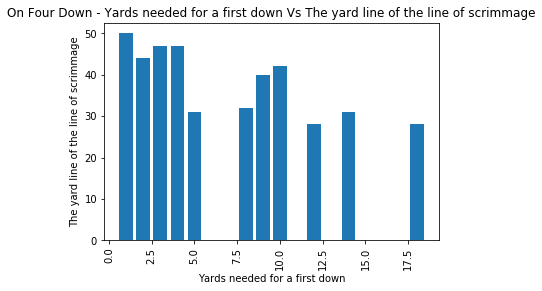

In [11]:
distance = four["Distance"]
yardLine = four["YardLine"]

plt.bar(distance, yardLine)
plt.title("On Four Down - Yards needed for a first down Vs The yard line of the line of scrimmage")
plt.xlabel("Yards needed for a first down")
plt.xticks(rotation=90)
plt.ylabel("The yard line of the line of scrimmage")

plt.show()

In [12]:
quarts = pd.DataFrame(df.groupby("PlayId").Quarter.max()).reset_index()
quarts.columns = ["PlayId", "Quarter"]

quartsCount = quarts.groupby("Quarter").count() 
quartsCount

,PlayId
Quarter,
1,7942
2,7441
3,7648
4,7779
5,197


In [13]:
s2017 = df.loc[df["Season"] == 2017]
s2018 = df.loc[df["Season"] == 2018]

In [52]:
avg_yards2017 = s2017["Distance"].mean()
avg_yards2018 = s2018["Distance"].mean() 
avg_weigt2017 = s2017["PlayerWeight"].mean()
avg_weigt2018 = s2018["PlayerWeight"].mean()
downs17 = s2017.groupby("Week").Down.value_counts()
downs18 = s2018.groupby("Week").Down.value_counts()

Text(0, 0.5, 'Number of plays')

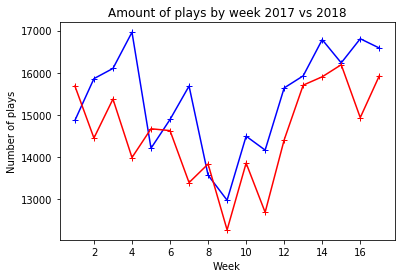

In [34]:
# Plays by week 2017 vs 2018
plt.plot(s2017.groupby(['Week']).count()['GameId'], marker = "+", color = "blue", label = "2017")
plt.plot(s2018.groupby(['Week']).count()['GameId'], marker = "+", color = "red", label = "2018")
plt.title("Amount of plays by week 2017 vs 2018")
plt.xlabel("Week")
plt.ylabel("Number of plays")

In [ ]:
plt.bar(s2017['Week'], s2017['Down'],  color = "blue", label = "2017")
plt.title("Amount of plays by week 2017 vs 2018")
plt.xlabel("Week")
plt.ylabel("Number of plays")